# D606 Task 2: Luxury Home Classification Using Random Forest

### B1. Propose one question relevant to a real-world organizational situation that you will answer using one of the following classification methods

<p>One question that is relevant to a real-world organizational situation that I will answer using the Random Forest classification method is: To what extent do housing features and neighborhood characteristics influence whether a home is classified as luxury, based on a random forest model?</p>

### B2. Define the goals of the data analysis

<p>The data analysis has four main goals. The first goal is to build a random forest classification model that can predict whether a home is considered luxury based on its housing features and neighborhood details. The second goal is to identify which features are most important in classifying a home as luxury. The third goal is to evaluate the model’s performance using metrics like accuracy, precision, recall, and F1 score to make sure it works well and is reliable. The fourth goal is to provide real estate agencies with useful insights by showing which property features are most linked to luxury homes, helping them improve marketing and pricing strategies.</p>

### C1. Explain how the classification method you chose analyzes the selected dataset. Include expected outcomes

<p>The random forest classification method analyzes the housing dataset by creating many decision trees. Each tree is trained on a random sample of the data, and at each decision point, the tree only looks at a random set of features rather than all of them. This randomness helps the model avoid overfitting and makes it more accurate when predicting new data. The model learns from housing features like square footage, number of bedrooms and bathrooms, and neighborhood details such as crime rate and school rating to classify whether a home is luxury or not.</p>

<p>After training, the model predicts the luxury status of new homes based on the patterns it has learned. Each tree makes a prediction, and the final result is based on the majority vote. The model also ranks the importance of each feature, which helps identify which housing or neighborhood factors have the biggest impact on whether a home is considered luxury.</p>

<p>There are two expected outcomes when using the random forest classification method on the housing dataset. The first outcome is that the model should accurately classify homes as luxury or non-luxury based on their features, with good results on metrics like accuracy, precision, recall, and F1 score. Second, the analysis should give real estate agencies useful insights into which housing and neighborhood features most influence luxury home classification, helping to improve marketing and pricing strategies.</p>

### C2. List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis

<p>I used three main Python libraries for the Random Forest classification analysis. First, the pandas library was used to load, clean, and prepare the housing dataset. I also used the to_csv() function from pandas to export the training, validation, and test sets as CSV files. Second, the scikit-learn library provided the RandomForestClassifier() function, which I used to build and train the Random Forest model. Scikit-learn also includes evaluation functions like accuracy_score(), precision_score(), and recall_score(), which I used to measure the model's performance. It also offers tools like GridSearchCV() and StratifiedKFold() for hyperparameter tuning. Third, the NumPy library was used behind the scenes by scikit-learn to perform numerical operations during model training and evaluation.</p>

### D1. Describe one data preprocessing goal relevant to the classification method from part B1

<p>One data preprocessing goal for this classification task is to convert categorical variables into a numerical format so they can be used by the Random Forest model. The dataset includes features like Fireplace, Garage, and HouseColor, which are stored as text values such as "Yes", "No", or color names. Since Random Forest models only work with numbers, I will use label encoding to convert these text values. This step helps prepare the data so the model can accurately learn patterns from all the features.</p>

### D2. Identify the initial dataset variables that you will use to perform the analysis for the classification question from part B1, and classify each variable as continuous or categorical

<p>The variables that I will use to perform the analysis for the Random Forest classification question from part B1 are: IsLuxury (categorical), Price (continuous), SquareFootage (continuous), NumBathrooms (continuous), BackyardSpace (continuous), CrimeRate (continuous), SchoolRating (continuous), AgeOfHome (continuous), DistanceToCityCenter (continuous), EmploymentRate (continuous), PropertyTaxRate (continuous), RenovationQuality (continuous), LocalAmenities (continuous), TransportAccess (continuous), PreviousSalePrice (continuous), Windows (continuous), Fireplace (categorical), Garage (categorical), and HouseColor (categorical).</p>

### D3. Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step

In [1]:
import pandas as pd

#loading the housing dataset
df = pd.read_csv('C:/Users/jcaye/Downloads/Housing Information Data.csv')

In [2]:
df.head()

,Unnamed: 0,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,4922,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,...,4.93,4.44,4.55,Yes,Blue,No,1,13,181861.54230,0
1,5009,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,...,4.08,5.56,6.83,No,Green,No,1,17,50042.59757,0
2,4450,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,...,4.26,8.07,8.48,Yes,Green,Yes,2,34,48400.34440,0
3,1070,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,...,4.45,5.00,6.27,Yes,Red,No,1,14,84594.12145,0
4,400,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,...,3.36,5.46,6.99,No,White,Yes,1,21,22934.59654,0


<p>I used the read_csv() function from the pandas library to load the housing information dataset into a DataFrame for analysis. The output from the head() function confirmed that the dataset was loaded successfully. The dataset contains information on 7,000 homes, including both housing features and neighborhood characteristics. It has 22 columns, with each row representing one house.</p>

In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)

<p>I used the drop() function to remove the Unnamed: 0 column from the dataset because it was just an index and not needed for analysis.</p>

In [4]:
df.isnull().sum()

Price                   0
SquareFootage           0
NumBathrooms            0
NumBedrooms             0
BackyardSpace           0
CrimeRate               0
SchoolRating            0
AgeOfHome               0
DistanceToCityCenter    0
EmploymentRate          0
PropertyTaxRate         0
RenovationQuality       0
LocalAmenities          0
TransportAccess         0
Fireplace               0
HouseColor              0
Garage                  0
Floors                  0
Windows                 0
PreviousSalePrice       0
IsLuxury                0
dtype: int64

<p>I used the isnull() function with the sum() function to count missing values in each column of the housing dataset. Since there were no missing values, I moved straight to encoding categorical variables.</p>

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Fireplace'] = label_encoder.fit_transform(df['Fireplace'])  # Yes/No to 1/0
df['Garage'] = label_encoder.fit_transform(df['Garage'])        # Yes/No to 1/0
df['HouseColor'] = label_encoder.fit_transform(df['HouseColor'])  # Color categories to integers

In [6]:
df.head()

,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,...,RenovationQuality,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,255614.8992,566.62,1.000000,4,779.42,20.56,5.62,39.46,10.08,97.29,...,4.93,4.44,4.55,1,0,0,1,13,181861.54230,0
1,155586.0947,1472.34,1.000000,2,656.13,15.62,5.63,40.51,7.89,93.22,...,4.08,5.56,6.83,0,1,0,1,17,50042.59757,0
2,131050.8324,550.00,1.779354,3,754.57,12.47,9.20,48.38,23.74,96.60,...,4.26,8.07,8.48,1,1,1,2,34,48400.34440,0
3,151361.7125,941.81,2.035254,2,439.59,22.22,7.08,94.67,5.22,91.45,...,4.45,5.00,6.27,1,2,0,1,14,84594.12145,0
4,113167.6128,550.00,1.064644,3,353.03,8.28,5.93,16.80,43.13,86.50,...,3.36,5.46,6.99,0,3,1,1,21,22934.59654,0


<p>I imported the LabelEncoder class from the sklearn library to convert categorical variables into numerical values, since Random Forest only work with numeric inputs. I used the fit_transform() function to apply label encoding to the categorical columns Fireplace, Garage, and HouseColor. After encoding, I used the head() function to verify that the transformation was successful.</p>

### D4. Provide a copy of the cleaned dataset 

In [7]:
#exporting the cleaned dataset to a CSV file
df.to_csv('d606_cleaned_dataset.csv', index=False)

<p>d606_cleaned_dataset.csv is the housing dataset that has been properly prepared for analysis using the Random Forest classification method. I included this file in my submission. </p>

### E1. Split the data into training, validation and test datasets and provide the files

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["IsLuxury"])  
y = df["IsLuxury"]                 

#splitting the dataset into training + temp (80%) and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

#splitting training + temp into training (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=24, stratify=y_train_val)

In [9]:
#printing dataset sizes to confirm splits
print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

Training set: (4200, 20)
Validation set: (1400, 20)
Test set: (1400, 20)


<p>Before splitting the data, I separated the features and the target variable IsLuxury. I stored the features in X and the target variable in y. Then, I used the train_test_split() function from the sklearn library to first split the data into training and test sets. After that, I split the training set again to create a validation set. In the final split, 60% of the data is used for training, 20% for validation and 20% for testing.</p>

#### Providing the training, validation, and test data files

In [10]:
#combining features and target for the training set, and exporting it
training_data = X_train.copy()
training_data['IsLuxury'] = y_train
training_data.to_csv('training_data.csv', index=False)

#combining features and target for the validation set, and exporting it
validation_data = X_val.copy()
validation_data['IsLuxury'] = y_val
validation_data.to_csv('validation_data.csv', index=False)

#combinining features and target for the test set, and exporting it
test_data = X_test.copy()
test_data['IsLuxury'] = y_test
test_data.to_csv('test_data.csv', index=False)

<p>I combined the features and target variable for the training, validation, and test sets, then saved each one as a CSV file. The training set was saved as "training_data.csv", the validation set as "validation_data.csv", and the test set as "test_data.csv".</p>

### E2. Create an initial model using the training dataset and provide a screenshot of the following metrics

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

#initializing the Random Forest model
rf_model = RandomForestClassifier(random_state=24)

#training the model using the training dataset
rf_model.fit(X_train, y_train)

#making predictions on the validation set
y_pred = rf_model.predict(X_val)
y_pred_prob = rf_model.predict_proba(X_val)[:, 1]

#calculating evaluation metrics
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc_roc = roc_auc_score(y_val, y_pred_prob)
conf_matrix = confusion_matrix(y_val, y_pred)

#printing evaluation metrics
print("Evaluating the initial Random Forest model on the validation dataset\n")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC-ROC: {auc_roc:.2f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Evaluating the initial Random Forest model on the validation dataset

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
AUC-ROC: 0.90
Confusion Matrix:
[[624  71]
 [ 68 637]]


<p>In this code, I started by importing the RandomForestClassifier() function from the sklearn library to create and train the Random Forest model. I also imported evaluation functions such as accuracy_score(), precision_score(), recall_score(), f1_score(), roc_auc_score(), and confusion_matrix() to measure the model's performance using various metrics.</p>

<p>I initialized the Random Forest model using the RandomForestClassifier() function and trained it on the training set. Then, I used the predict() function to have the model predict class labels for the validation set. I also used the predict_proba() function to predict the probability of each class, which is needed to calculate the AUC-ROC score.</p>

<p>I calculated and displayed the accuracy, precision, recall, F1 score, AUC-ROC, and confusion matrix for the Random Forest model. The model scored 90% on all key metrics: accuracy, precision, recall, F1 score, and AUC-ROC. The confusion matrix shows 624 true negatives, 71 false positives, 68 false negatives, and 637 true positives.</p>

### E3. Perform hyperparameter tuning on the validation dataset using k-fold cross validation to find the optimized model.

In [12]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

#defining the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],  #number of trees
    "max_depth": [5, 10, 20, None],  #max depth of each tree
    "min_samples_split": [2, 5, 10],  #min samples required to split a node
    "min_samples_leaf": [1, 2, 4],  #min samples required at each leaf
}

#initializing the Random Forest classifier
rf_model = RandomForestClassifier(random_state=24)

#defining the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

#initializing GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="accuracy",  #accuracy is the metric to optimize
    cv=cv,  #use 5-fold cross-validation
    verbose=2, 
    n_jobs=-1,  
)

#performing the grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=RandomForestClassifier(random_state=24), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

<p>The hyperparameters that I selected for tuning are ‘n_estimators’, ‘max_depth’, ‘min_samples_split’, and’ min_samples_leaf’. The hyperparameter ‘n_estimators’ represents the number of trees in the forest. The hyperparameter ‘max_depth’ controls the maximum depth of each tree. The hyperparameter ‘min_samples_split’ is the minimum number of samples required to split a node. The hyperparameter ‘min_samples_leaf’ is the minimum number of samples required in a leaf node.</p>

<p>Here, I will discuss the justification for the selected hyperparameters. I selected ‘n_estimators’ because it controls the number of trees in the forest, with more trees typically improving performance but increasing training time. I selected ‘max_depth’ because it limits tree depth, helping to prevent overfitting by avoiding overly complex trees. I selected ‘min_samples_split’ because it reduces overfitting by requiring more samples to split a node. I selected ‘min_samples_leaf’ because it reduces overfitting by ensuring that leaf nodes have enough samples. Overall, these hyperparameters help improve the model's performance and prevent overfitting.</p>

In [13]:
#finding best hyperparameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

#displaying the results
print("Best Hyperparameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Score: 0.8976190476190476


<p>The optimized Random Forest model’s best hyperparameters are 'max_depth' = None, 'min_samples_leaf' = 1, 'min_samples_split' = 5, and 'n_estimators' = 200. This combination of hyperparameters achieved an average accuracy score of 89.76% during cross-validation.</p>

#### Evaluating the optimized model on the validation dataset

In [14]:
#training the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=24)
best_rf_model.fit(X_train, y_train)

#making predictions on the validation set
y_val_pred = best_rf_model.predict(X_val)
y_val_pred_prob = best_rf_model.predict_proba(X_val)[:, 1]

#calculating evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
auc_roc = roc_auc_score(y_val, y_val_pred_prob)
conf_matrix = confusion_matrix(y_val, y_val_pred)

#displaying metrics
print("Evaluating the optimized Random Forest model on the validation dataset\n")
print(f"Validation Accuracy: {accuracy:.2f}")
print(f"Validation Precision: {precision:.2f}")
print(f"Validation Recall: {recall:.2f}")
print(f"Validation F1 Score: {f1:.2f}")
print(f"Validation AUC-ROC: {auc_roc:.2f}")
print(f"Validation Confusion Matrix:\n{conf_matrix}")

Evaluating the optimized Random Forest model on the validation dataset

Validation Accuracy: 0.90
Validation Precision: 0.90
Validation Recall: 0.90
Validation F1 Score: 0.90
Validation AUC-ROC: 0.90
Validation Confusion Matrix:
[[623  72]
 [ 68 637]]


<p>I evaluated the optimized Random Forest model using the validation dataset. The model achieved an accuracy, precision, recall, F1 score, and AUC-ROC of 90%. The confusion matrix shows 623 true negatives, 72 false positives, 68 false negatives, and 637 true positives.</p>

### E4. Use the optimized model identified in part E3 to make predictions using the test dataset and provide a screenshot of the following metrics

In [15]:
#training the model with the best hyperparameters
best_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=24)
best_rf_model.fit(X_train, y_train)

#making predictions on the test set
y_test_pred = best_rf_model.predict(X_test)
y_test_pred_prob = best_rf_model.predict_proba(X_test)[:, 1]

#calculating evaluation metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc_roc = roc_auc_score(y_test, y_test_pred_prob)
conf_matrix = confusion_matrix(y_test, y_test_pred)

#displaying metrics
print("Evaluating the optimized Random Forest model on the test dataset\n")
print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")
print(f"Test AUC-ROC: {test_auc_roc:.2f}")
print(f"Test Confusion Matrix:\n{conf_matrix}")

Evaluating the optimized Random Forest model on the test dataset

Test Accuracy: 0.90
Test Precision: 0.91
Test Recall: 0.89
Test F1 Score: 0.90
Test AUC-ROC: 0.90
Test Confusion Matrix:
[[631  63]
 [ 75 631]]


<p>I evaluated the optimized Random Forest model using the test dataset. The model achieved 90% accuracy, 91% precision, 89% recall, 90% F1 score, and a 90% AUC-ROC. The confusion matrix shows 631 true negatives, 63 false positives, 75 false negatives, and 631 true positives.</p>

#### Feature importance

In [16]:
#getting features importances
importances = best_rf_model.feature_importances_

#pairing feature names with their importance values
feature_importance = sorted(zip(X_train.columns, importances), key=lambda x: x[1], reverse=True)

#printing top features
for feature, importance in feature_importance:
    print(f"{feature}: {importance:.4f}")

Price: 0.4357
PreviousSalePrice: 0.1627
SquareFootage: 0.0511
RenovationQuality: 0.0389
NumBathrooms: 0.0352
SchoolRating: 0.0291
DistanceToCityCenter: 0.0265
CrimeRate: 0.0252
AgeOfHome: 0.0249
BackyardSpace: 0.0247
LocalAmenities: 0.0245
TransportAccess: 0.0242
PropertyTaxRate: 0.0231
EmploymentRate: 0.0224
NumBedrooms: 0.0198
Windows: 0.0179
HouseColor: 0.0069
Fireplace: 0.0028
Garage: 0.0027
Floors: 0.0018


<p>In this code, I used the feature_importances_ method to get the feature importance scores from the trained Random Forest model. These scores show how much each feature contributes to the model's predictions. Price is the most important feature, with a score of 0.4357, suggesting that luxury homes usually have much higher prices. The second most important feature is PreviousSalePrice, with a score of 0.1627, meaning homes with a history of high sale prices are more likely to be classified as luxury, even if their current value has changed. SquareFootage ranks third with a score of 0.0511, showing that larger homes are more likely to be seen as luxury. RenovationQuality ranks fourth with a score of 0.0389, showing that homes with high-quality renovations are more likely to be luxury. On the other hand, features like Fireplace, Garage, and Floors have very low importance scores, indicating they have little effect on the model's predictions. </p>

### F1. Compare and discuss the metrics of accuracy, precision, recall, F1 score, and AUC-ROC from the use of the optimized model on the test dataset and the initial model on the training dataset to evaluate the performance of the optimized model

<p>Here I will compare and discuss the metrics between the initial Random Forest model that was evaluated on the validation dataset and the optimized Random Forest model that was evaluated on the test dataset. Both models achieved 90% accuracy, meaning they correctly predicted luxury and non-luxury homes 90% of the time. This shows that the model generalizes well and maintains strong performance even after hyperparameter tuning. Precision improved slightly from 90% to 91%, suggesting the optimized model is a bit better at correctly identifying luxury homes without misclassifying non-luxury ones. Recall dropped slightly from 90% to 89%, meaning the optimized model missed slightly more actual luxury homes compared to the initial model. The F1 score remained at 90% for both models, showing a good balance between precision and recall. The AUC-ROC also remained at 90%, indicating both models are equally good at distinguishing between luxury and non-luxury homes across different thresholds. The confusion matrices for both models show similar distributions of true positives, true negatives, false positives, and false negatives, which supports the overall consistency in performance.</p>

<p>Overall, the optimized Random Forest model performs very similarly to the initial model, with only small changes in precision and recall. The consistent scores across accuracy, precision, recall, F1 score, and AUC-ROC on both the validation and test datasets show that the model is reliable, generalizes well to new data, and is not overfitting. The slight increase in precision and stable F1 score suggests that hyperparameter tuning helped the model improve slightly in identifying luxury homes while still maintaining strong overall performance.</p>

### F2. Discuss the results and implications of your classification analysis

<p>The classification analysis using a Random Forest model produced strong and consistent results. Both the initial and optimized models reached 90% accuracy and showed high precision, recall, F1 score, and AUC-ROC. This means the model is very effective at distinguishing between luxury and non-luxury homes based on housing and neighborhood features. The model's performance remained stable even after hyperparameter tuning and testing on new data, which shows it generalizes well and is not overfitting.</p>

<p>The feature importance analysis showed that price, previous sale price, square footage, and renovation quality are the most influential factors in determining whether a home is considered luxury. This matches real-world trends, where luxury homes are usually larger, more expensive, and better maintained or upgraded. On the other hand, features like fireplace, garage, and number of floors had little effect on the model's predictions.</p>

<p>The analysis has several important implications. First, the model's strong performance shows it can reliably classify homes as luxury or not based on their features, reducing the need for manual labeling and helping real estate platforms make faster decisions. Second, by revealing which features matter most, such as price, previous sale price, square footage, and renovation quality, real estate agencies can better understand what defines a luxury home and use that insight to guide pricing, marketing, and home improvement decisions. Third, builders and developers can use these insights to prioritize features in new homes or renovations that appeal to high-end buyers.</p>

### F3. Discuss one limitation of your data analysis

<p>One limitation of this data analysis is that the model can only use the features provided in the dataset. While the data includes many important housing and neighborhood features, it may be missing other key factors that affect whether a home is considered luxury, such as interior design, view, or smart home features. Because these were not included, the model might not fully capture everything that makes a home "luxury". As a result, the model's predictions may not work well in real-life situations where other details also play an important role.</p>

### F4. Recommend a course of action for the real-world organizational situation from part B1 based on your results and implications discussed in part F2

<p>Based on the results of the classification analysis, I recommend that real estate agencies use the Random Forest model to automatically classify homes as luxury or not based on their features. Since the model showed strong and consistent performance across accuracy, precision, recall, and AUC-ROC, it can reliably make these classifications without manual work. This can save time and help real estate agencies make faster, data-driven decisions when listing or marketing homes.</p>

<p>In addition, real estate agencies should use the feature importance insights to improve pricing and marketing strategies. Since features like price, previous sale price, square footage, and renovation quality had the most impact on predicting luxury homes, these should be highlighted in property listings and advertisements. Builders and developers can also use these insights to focus on features that make homes more likely to be seen as luxury. </p>

### G. Panopto Video

<p>Skip for now</p>

### H. Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable

<p>Skip for now</p>

### I. Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized

<p>Skip for now</p>

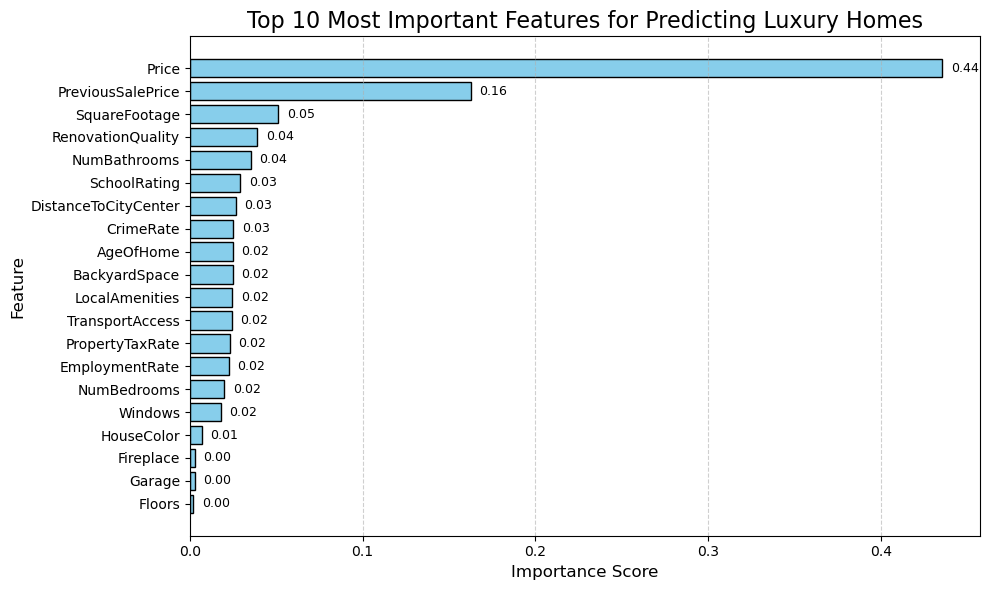

In [19]:
# Assuming you already have the feature importances and feature names
importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Create DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Only take the top 10 features (optional)
top_features = feature_importance_df

# Fancy Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue', edgecolor='black')

# Add value labels at the end of each bar
for bar in bars:
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}", va='center', fontsize=9)

plt.gca().invert_yaxis()  # Highest on top
plt.title('Top 10 Most Important Features for Predicting Luxury Homes', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

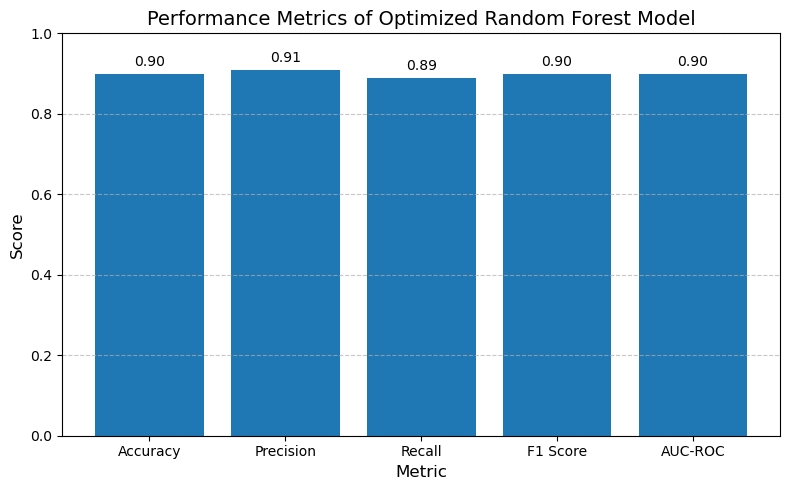

In [21]:
import matplotlib.pyplot as plt

# Define the metrics and their scores
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC']
scores = [0.90, 0.91, 0.89, 0.90, 0.90]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores)
plt.ylim(0, 1)  # Set y-axis range from 0 to 1
plt.title('Performance Metrics of Optimized Random Forest Model', fontsize=14)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Metric', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the value labels on top of the bars
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()